<a href="https://colab.research.google.com/github/minjeon99/ESAA/blob/Week2/w2_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 4. 시각화 도구**

## **2. Seaborn 라이브러리 - 고급 그래프 도구**
- **Seaborn**: Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전

### **데이터셋 가져오기**

In [3]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

### **회귀선이 있는 산점도**
- `regplot()`: 2개의 서로 다른 연속 변수 사이의 산점도 + 선형회귀분석에 의한 회귀선
- `fit_reg=False`: 회귀선 안 보이게 설정

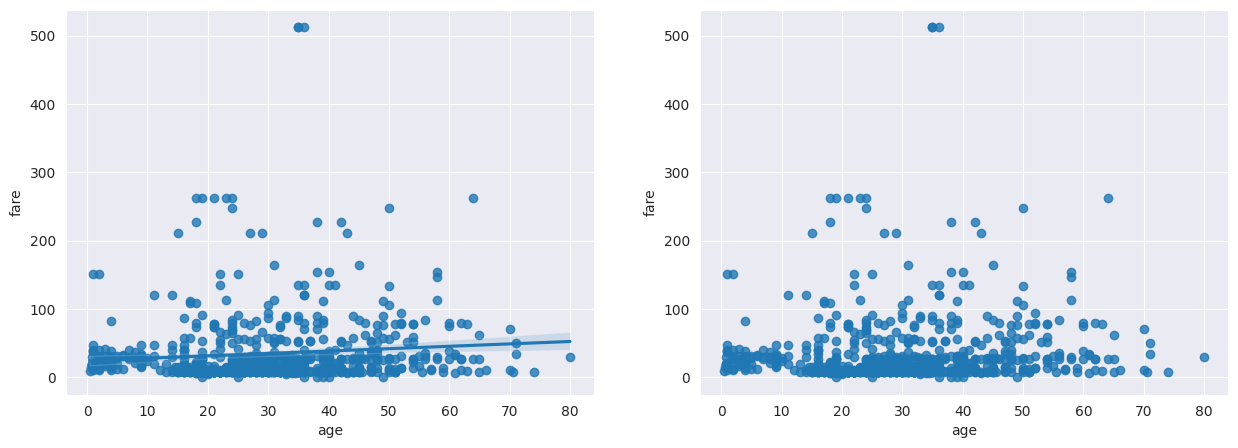

In [4]:
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 테마 설정(5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age', # x축 변수
            y='fare', # y축 변수
            data=titanic,# 데이터
            ax=ax1 # axe 객체 - 1번째 그래프
            )

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age', # x축 변수
            y='fare', # y축 변수
            data=titanic,# 데이터
            ax=ax2, # axe 객체 - 2번째 그래프
            fit_reg=False
            )

plt.show()

### **히스토그램/커널 밀도 그래프**
- `distplot()`: 단변수 데이터의 분포 확인
  - 히스토그램, 커널 밀도 함수를 그래프로 출력
    - 커널 밀도 함수: 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수
  - `hist=False`: 히스토그램 표시 X
  - `kde=False`: 커널 밀도 그래프 표시 X
- `displot()`: 밀도 그래프
- `histplot()`: 히스토그램

<ipython-input-7-ddc4a48ff873>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)


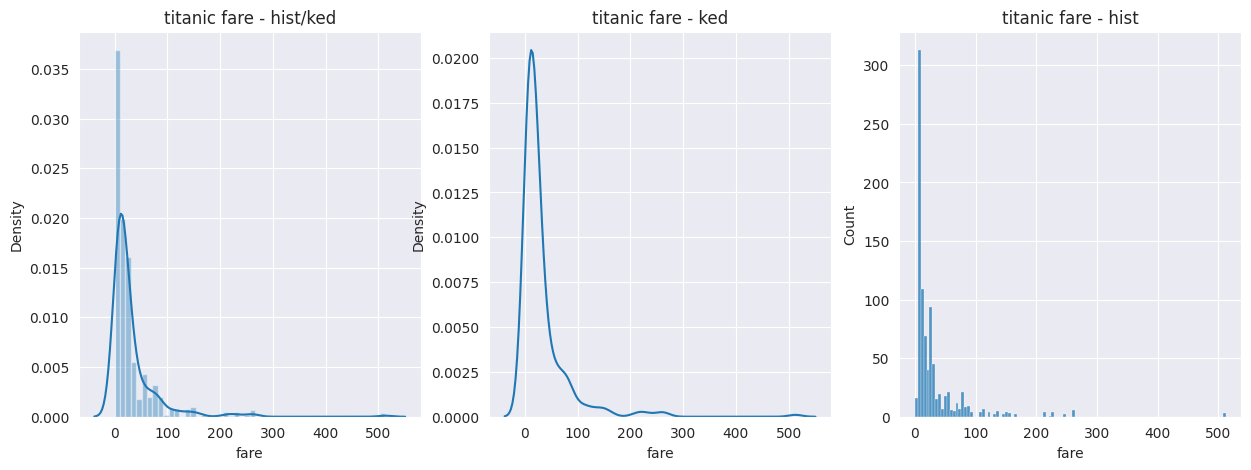

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplo
sns.histplot(x='fare', data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

### **히트맵**
- `heatmap()`
- 2개의 범주형 변수를 x,y축에 놓고 데이터를 매트릭스 형태로 분류
- 한 변수를 행 인덱스로, 나머지 변수를 열 이름으로 설정
- `aggfunc = 'size'`: 데이터 값의 크기를 기준으로 집계

<Axes: xlabel='class', ylabel='sex'>

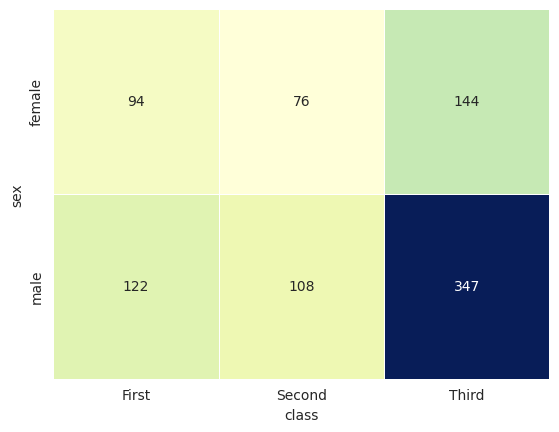

In [7]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table, # 데이터프레임
            annot=True, fmt='d', # 데이터 값 표시 여부, 정수형 포맷
            cmap='YlGnBu', # 컬러 맵
            linewidth=.5, # 구분선
            cbar=False
            )

### **범주형 데이터의 산점도**
- `stripplot()`
- `swarmplot()`: 데이터의 분산까지 고려하여 데이터 포인트가 서로 중복되지 않도록 그림
  
  -> 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


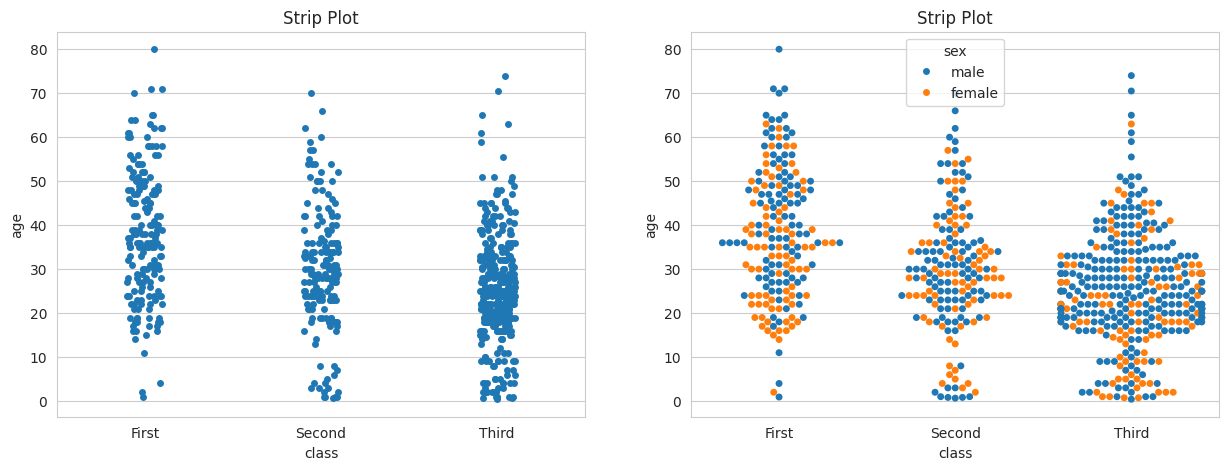

In [10]:
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려(중복 표시 O)
sns.stripplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # 데이터셋 - 데이터프레임
              ax=ax1 # axe 객체 - 1번째 그래프
              )

# 이산형 변수의 분포 - 데이터 분산 고려(중복 표시 X)
sns.swarmplot(x='class', # x축 변수
              y='age', # y축 변수
              data=titanic, # 데이터셋 - 데이터프레임
              ax=ax2, # axe 객체 - 2번째 그래프
              hue='sex' # 남녀 성별을 색상으로 구분하여 출력
              )

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

### **막대 그래프**
- `barplot()`
- `dodge=False`: 축 방향으로 분리하지 않고 누적 출력

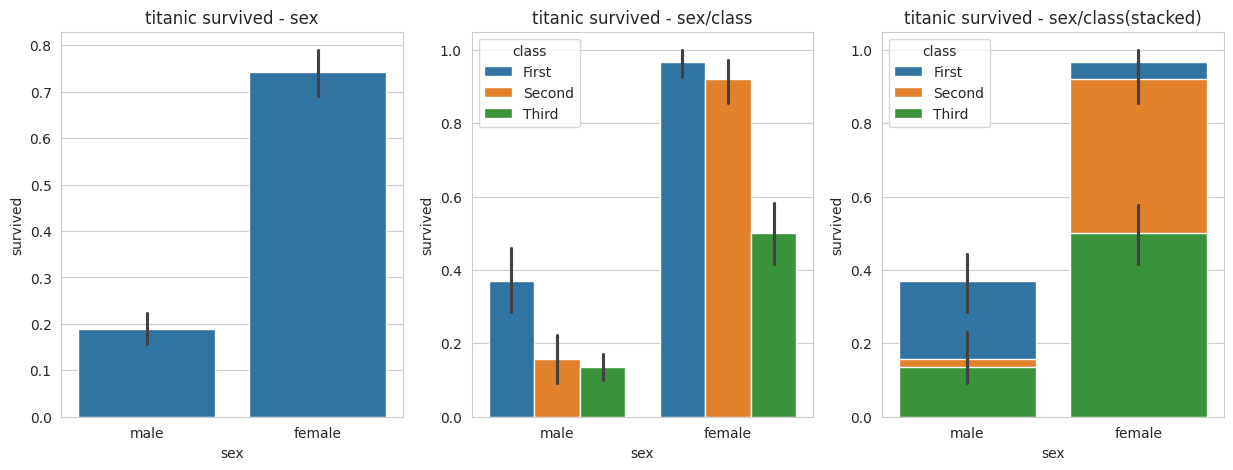

In [12]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x, y축에 변수 할당하고 hue 옵션 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

### **빈도 그래프**
- `countplot()`: 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄

<ipython-input-14-a35f090aaf1b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)


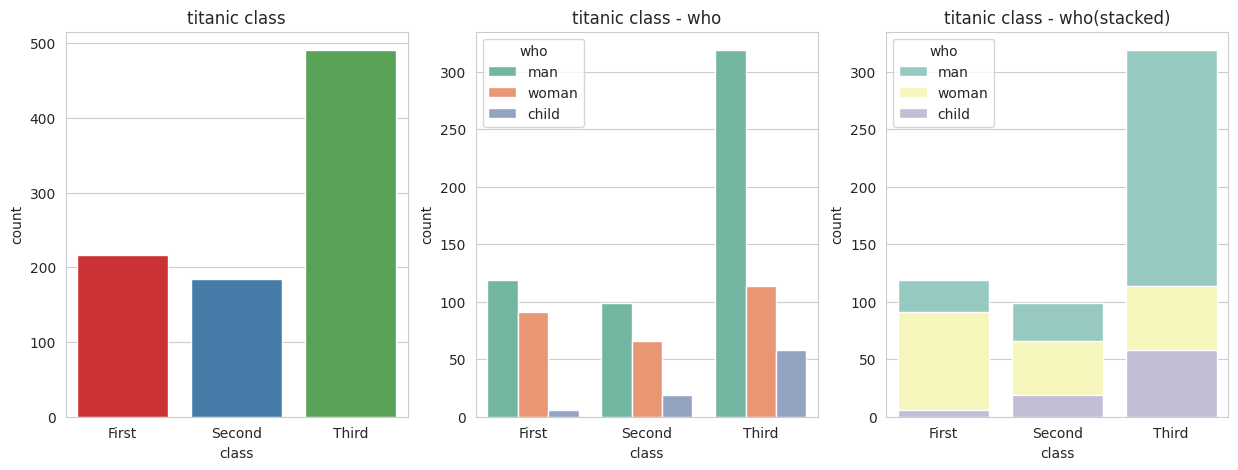

In [14]:
# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge=False 옵션 추가(축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### **박스 플롯/바이올린 그래프**
- **박스 플롯**: `boxplot()`
  - 범주형 데이터 분포와 주요 통계지표를 함께 제공
  - 데이터가 퍼져 있는 분산의 정도를 정확하게 알기 어려움

    => 바이올린 그래프: 커널 밀도 함수 그래프를 y축 방향에 추가
- **바이올린 그래프**: `violinplot()`

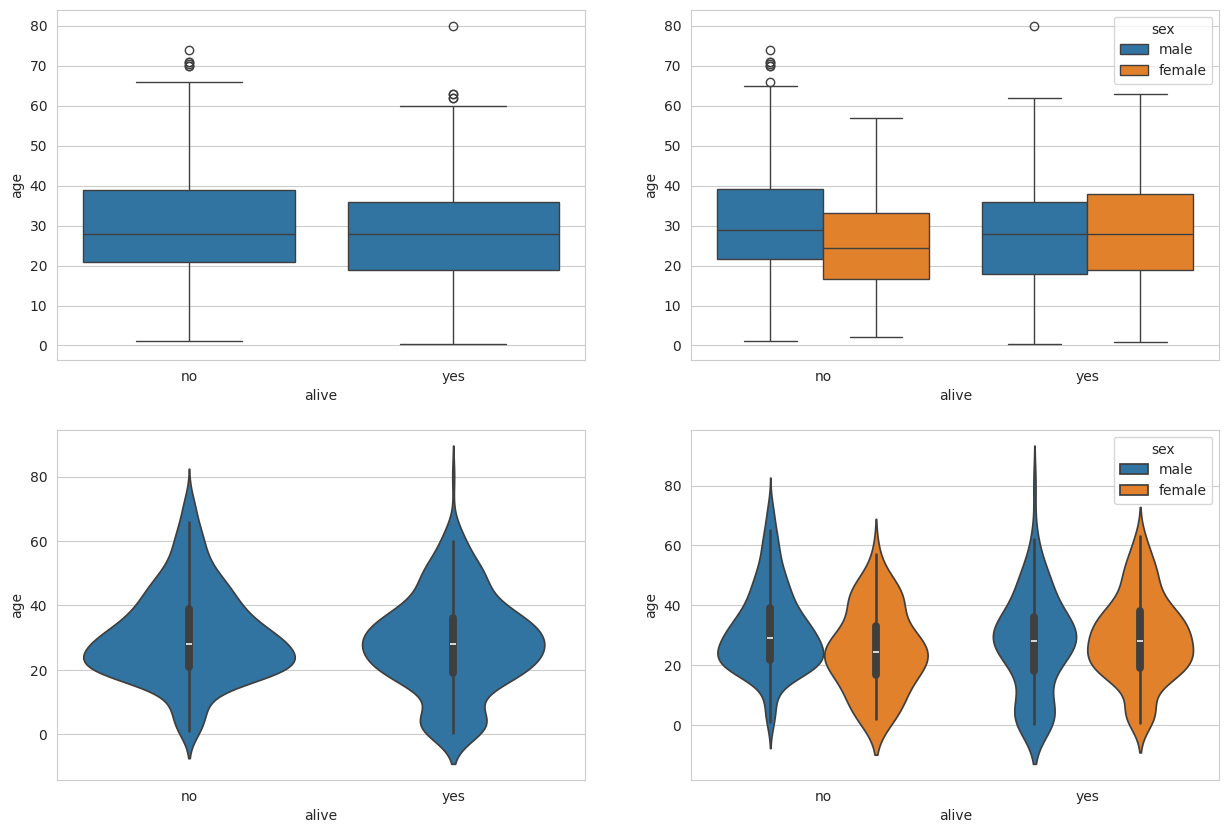

In [15]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 박스 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

### **조인트 그래프**
- `jointplot()`
  - 산점도를 기본으로 표시
  - x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌

  => 두 변수의 관계와 데이터가 분산되어 있는 정도 파악하기 좋음
- `kind='reg'`: 회귀선 추가
- `kind='hex'`: 육각 산점도
- `kind='kde'`: 커널 밀집 그래프

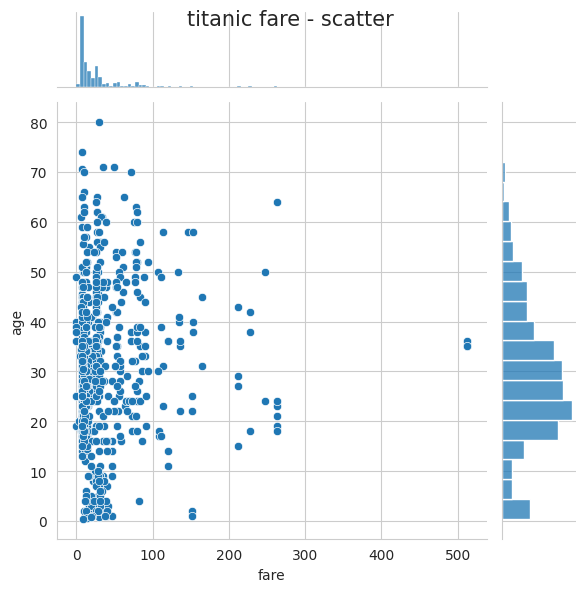

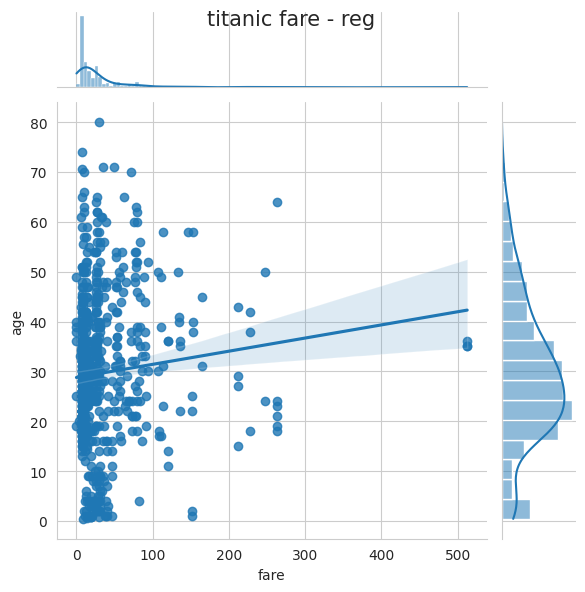

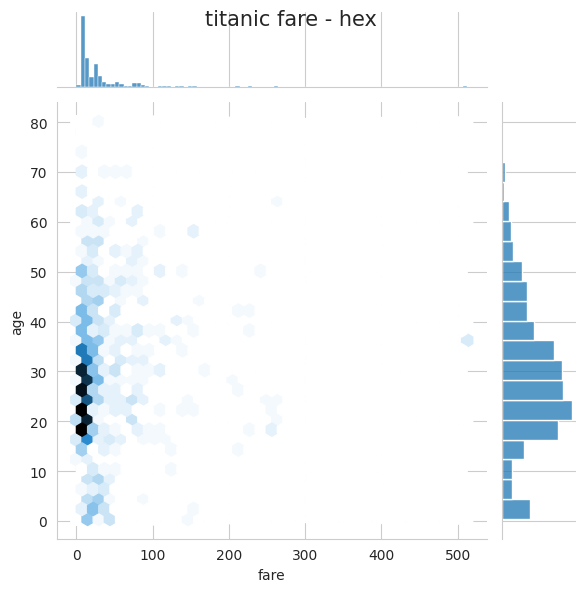

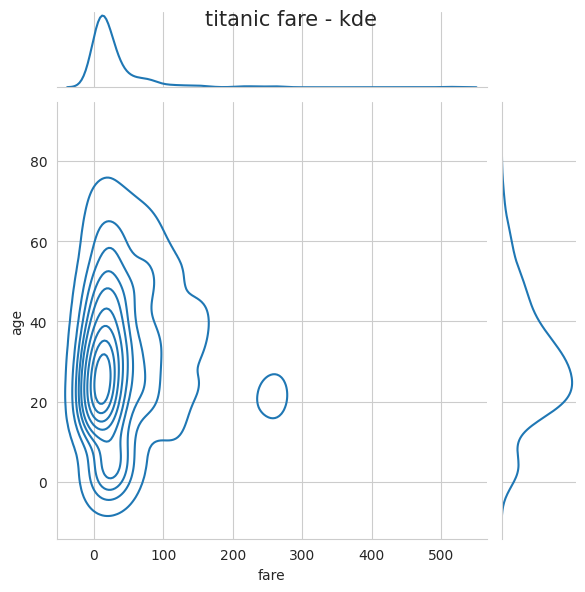

In [16]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(x='fare', y='age', data=titanic)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)

# 조인트 그래프 - 육각 그래프
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)

# 차트 제목 표시
j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j3.fig.suptitle('titanic fare - hex', size=15)
j4.fig.suptitle('titanic fare - kde', size=15)

plt.show()

### **조건을 적용하여 화면을 그리드로 분할하기**
- `FacetGrid()`
  - 행, 열 방향으로 서로 다른 조건을 적용하여 여러 개의 서브 플롯 만들기

    -> 각 서브 플롯에 적용할 그래프 종류를 `map()` 메소드 이용해 그리드 객체에 전달

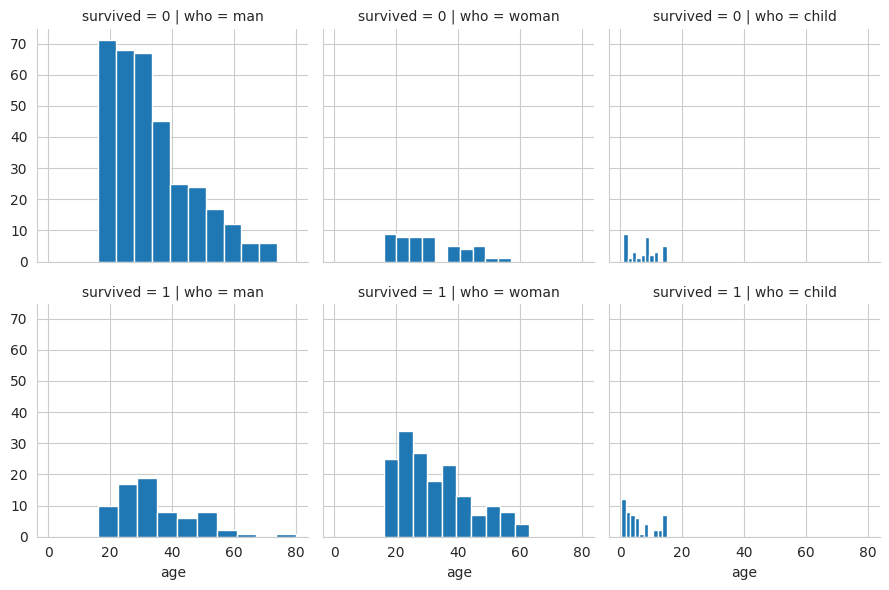

In [17]:
# 조건에 따라 그리드 나누기
g = sns.FacetGrid(data=titanic, col='who', row='survived')

# 그래프 적용하기
g = g.map(plt.hist, 'age')

- 여성 생존자가 많음
- 활동성 좋은 20~40대 생존자가 많음

### **이변수 데이터의 분포**
- `pairplot()`: 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝 지을 수 있는 모든 조합에 대해 표현
  -

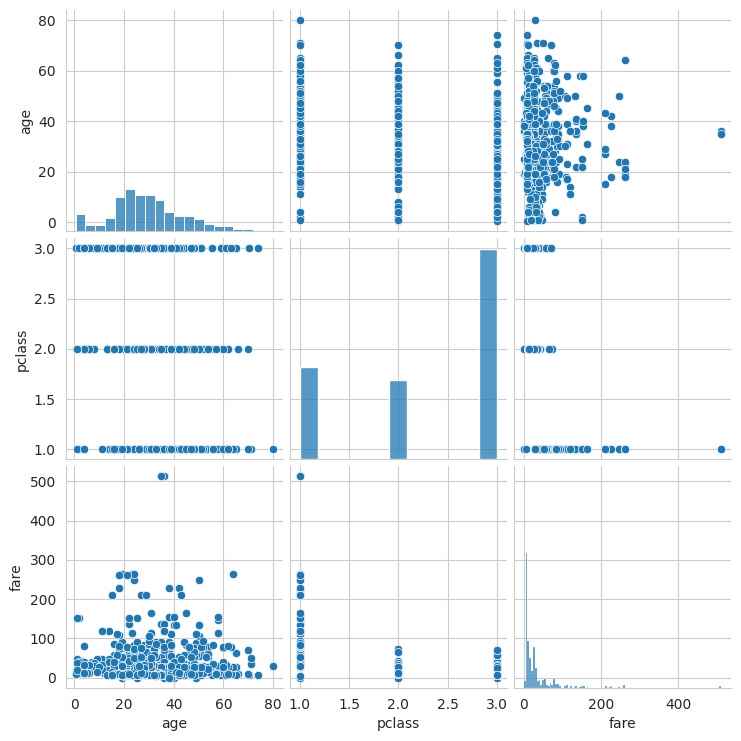

In [18]:
# titanic 데이터셋 중에서 분석 데이터 선택하기
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

## **3. Folium 라이브러리 - 지도 활용**
- **Folium 라이브러리**: 지도 위에 시각화할 때 유용한 도구
  - 세계 지도 기본 지원 + 다양한 스타일의 지도 이미지 제공

### **Folium 설치하기**

In [1]:
!pip install folium

### **지도 만들기**
- `Map()`
  - 고정된 것이 아니고 줌(zoom) 기능과 화면 이동(scroll) 모두 가능
- 스파이더(Spyder)와 같은 IDE에서 실행해도 지도 표시되지 않음
  - Follum은 웹 기반 지도를 만들기 때문에 웹 환경에서만 지도 확인 가능
  - 지도 객체에 `save()` 메소드 적용하여 HTML 파일로 저장하고 웹브라우저에서 파일 열어 확인
  - Jupyter Notebook 등 웹 기반 IDE에서는 지도 객체 바로 확인 가능
- `location`: 입력한 [위도, 경도] 지점 중심으로 지도 보여줌
- `zoom_start`:화면 확대 비율 조절

In [17]:
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 지도를 HTML 파일로 저장
seoul_map.save('./seoul.html')

In [23]:
seoul_map

### **지도 스타일 적용하기**
- `tiles` 옵션: 지도에 적용하는 스타일 변경하여 지정

In [21]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner', zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [37]:
seoul_map2

- 지도 스타일을 넣으면 오류 생기는 듯
- [오류 해결 참고 벨로그](https://velog.io/@slocat/EDA-Folium-%EA%B8%B0%EC%B4%88-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%B7%A8%EC%97%85-%EC%8A%A4%EC%BF%A8-%EC%8A%A4%ED%84%B0%EB%94%94-%EB%85%B8%ED%8A%B8-122)

- `'Stamen Terrain'`: 산악 지형 등의 지형이 선명하게 드러남

In [38]:
seoul_map3

- `'Stamen Toner'`: 흑백 스타일로 도로망을 강조

### **지도에 마커 표시**
- `Marker()`: 위도, 경도 입력하면 Folium 지도에 마커 표시
- `popup` 옵션: 마커를 클릭했을 때 팝업창에 표시해주는 텍스트 추가

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ESAA_dataset/서울지역 대학교 위치.xlsx', engine='openpyxl')

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat, lng], popup=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장
seoul_map.save('./seoul_colleges.html')

In [62]:
# index에 이름 들어가게 수정, 스타일 옵션 제거 코드(확인용.내가)
df = pd.read_excel('/content/drive/MyDrive/ESAA_dataset/서울지역 대학교 위치.xlsx', engine='openpyxl', index_col='Unnamed: 0')

seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.Marker([lat, lng], popup=name).add_to(seoul_map)

seoul_map

- 원형 마커 표시: `CircleMarker()`

In [65]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color='coral',
                      fill_opacity=0.7,
                      popup=name).add_to(seoul_map)
seoul_map.save('./seoul_colleages2.html')

In [66]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat, lng],
                      radius=10,
                      color='brown',
                      fill=True,
                      fill_color='coral',
                      fill_opacity=0.7,
                      popup=name).add_to(seoul_map)
seoul_map

### **지도 영역에 단계구분도(Choropleth Map) 표시하기**
- `Choropleth()`
  - 행정구역 같이 경계에 둘러싸인 영역에 색칠/음영 등으로 정보 나타내는 시각화 방법
  - 전달하려는 정보의 값이 커지면 색이나 음영이 진해짐

In [67]:
import json

# 데이터 불러와서 데이터프레임으로 변환
file_path = '/content/drive/MyDrive/ESAA_dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = '/content/drive/MyDrive/ESAA_dataset/경기도행정구역경계.json'
try:
  geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
  geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502, 126.982],
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택
year = '2007'

# Choropleth 클래스로 단계구분도 표시
folium.Choropleth(geo_data=geo_data,
                  data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name'
                  ).add_to(g_map)

g_map.save('./gyonggi_population_'+year+'.html')

In [58]:
g_map = folium.Map(location=[37.5502, 126.982])
year = '2007'
folium.Choropleth(geo_data=geo_data,
                  data=df[year],
                  columns=[df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on='feature.properties.name'
                  ).add_to(g_map)

g_map
# 확인용